### Makine Öğrenmesine Giriş

Bu derste makine öğrenmesine giriş yapılacaktır. Makine öğrenmesinde temel olarak kullanılan iris veri seti ile çalışılacak. KNN algoritması ile iris veri seti üzerinde tahmin işlemi yapılacak.

Uygulamaya geçmeden önce kısaca makine öğrenmesine değinerek başlayalım.

## MAKİNE ÖĞRENMESİ

Makine öğrenmesi, bilgisayar sistemlerinin verilerden öğrenerek performanslarının artmasını sağlayan yapay zeka alt dalıdır. Makine öğrenmesi 3 temel kategoride incelenebilir. Bunlar;

+ **Denetimli Öğrenme(Supervised Learning)**
  * Etiketli veri ile çalışır.
  * Sınıflandırma ve regresyon problemlerinde kullanılır.
  * KNN, Karar Ağaçları, Yapay Sinir Ağları örnek verilebilir.

+ **Denetimsiz Öğrenme(Unsupervised Learning)**
  * Etiketsiz veri kullanır.
  * Kümeleme ve boyut indirgeme
  * K-means 

+ **Pekiştirmeli Öğrenme(Reinforcement Learning)**
  * Ajan-çevre etkileşimi
  * Ödül ceza mekanizması
  

### Iris Veri Seti

İris veri seti makine öğrenmesi alanında en çok kullanılan veri setinden biridir. İris veri seti;

* 3 farklı iris çiçeği(setosa,versicolor,virginica)
* Her tür için 50 örnek
* Her örnek için 4 feature(sepal uzunluğu,sepal genişliği,petal uzunluğu,petal genişliği) bulunmaktadır.


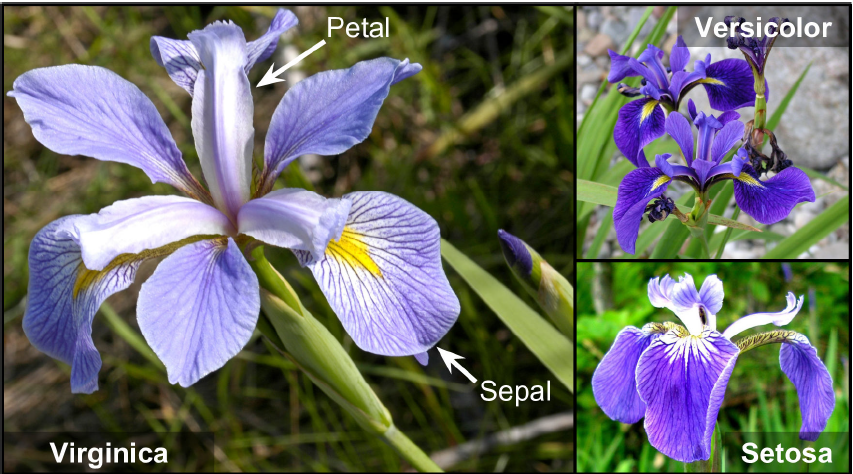

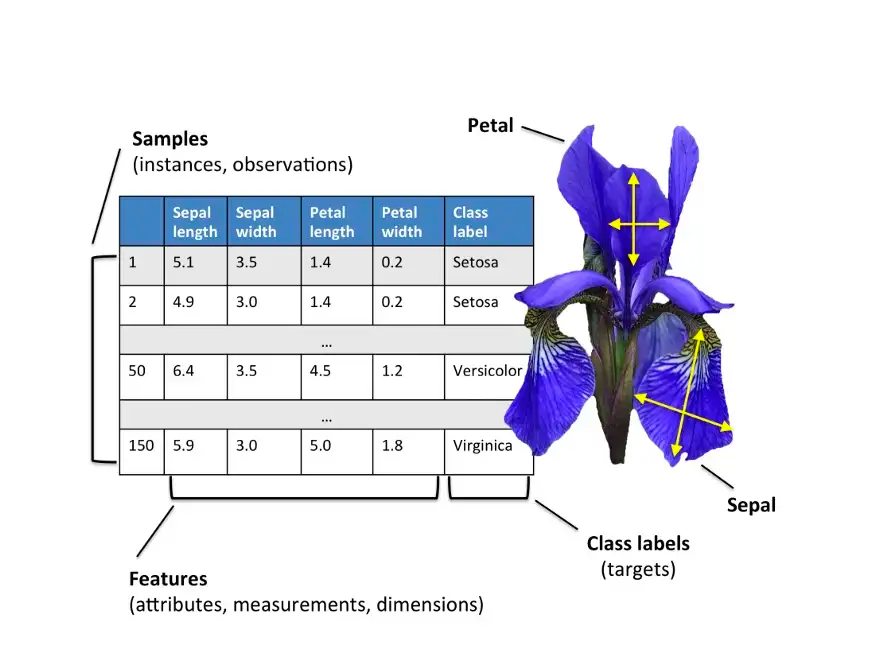

### RESİM KAYNAKLARI 
https://www.google.com/url?sa=i&url=https%3A%2F%2Feminebozkus.medium.com%2Fexploring-the-iris-flower-dataset-4e000bcc266c&psig=AOvVaw2sNC2jydujFQVfh8WP5XXE&ust=1756124170140000&source=images&cd=vfe&opi=89978449&ved=0CAMQjB1qFwoTCMCtkMK2o48DFQAAAAAdAAAAABAM

https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.veribilimiokulu.com%2Fnedir-bu-iris-cicek-muhabbeti%2F&psig=AOvVaw1_iQ1hLbHSEvpqUimhAaEL&ust=1756124148143000&source=images&cd=vfe&opi=89978449&ved=0CBUQjRxqFwoTCJDeouK2o48DFQAAAAAdAAAAABAL

### KULLANILAN KÜTÜPHANELER

1. **Scikit-Learn Kütüphanesi**
   * Bu kütüphane Python' da makine öğrenmesi için yaygın olarak kullanılan bir kütüphanedir.
   * Sınıflandırma, regresyon, boyut indirgeme, kümeleme algoritmalarını içerir.
   * İris, digits, Boston House Price gibi veri setlerini içerir.

2. **Numpy**
   * Bilimsel hesaplamalar için kullanılan temel kütüphanedir.
   * Çok boyutlu diziler, matematiksel hesaplamalar,lineer cebir operasyonları vb.

3. **Pandas**
   * Veri manipülasyonu ve analizi için kullanılan temel kütüphanedir.
   * DataFrame ve Series veri yapıları
   * Veri okumaya, yazma(CSV,Excel,json vb.)
   * İstatistiksel operasyonlar.

4. **Matplotlib / Seaborn** 
   * Veri görselleştirme


In [52]:
#Kütüphanelerin yüklenmesi

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix



### VERİ SETİ ANALİZİ

1. **Veri Seti Yapısı**

Yukarıda da bahsettiğimiz gibi iris veri seti 3 farklı iris çiçeğinin 4 farklı özelliğini içeren bir veri setidir.

  **Features(Özellikler)**
  1. Sepal Uzunluğu(cm): Çanak yaprak uzunluğu
  2. Sepal Genişliği(cm): Çanak yaprak genişliği
  3. Petal Uzunluğu(cm): Taç yaprak uzunluğu
  4. Patal Genişliği(cm): Taç yaprak genişliği

  

In [53]:
#iris veri setini yükleme
iris = load_iris()

In [54]:
#veri setinin anahtarlarını inceleme
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [55]:
#veri setinin açıklaması
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [56]:
#veri setinin hedef isimleri
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [57]:
#veri setinin özellik isimleri
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [58]:
#verinin tipi
print(type(iris['data']))

<class 'numpy.ndarray'>


In [59]:
#verinin boyutu
print(iris['data'].shape)


(150, 4)


In [60]:
#verinin ilk 5 satırı
print(iris['data'][:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [61]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### VERİ HAZIRLIĞI VE MODELLEME

1. **Veri Bölme**

   Veri seti eğitim ve test veri seti olarak bölünür. Bu örnekte train_test_split kullanıldı. 

   Eğitim seti(%80): Model eğitimi için verinin %80 i ayrıldı.
   Test seti(20): Test için verinin %20 si ayrıldı.

2. **KNN Algoritması(K-En Yakın Komşu Algoritması)**

   KNN, örnek tabanlı bir öğrenme algoritmasıdır.

   **Çalışma Prensibi**
      Yeni bir veri noktası geldiğinde:
      * Tüm eğitim örnekleriyle mesafe hesaplanır.
      * En yakın K komşu belirlenir.
      * Çoğunluk oylaması ile sınıf atanır.
      
      **Hiperparametreler**
      * K değeri(komşu sayısı)
      * Mesafe metriği
      * Ağırlıklandırma stratejisi

      **Avantajlar** 
      * Basit ve anlaşılır.
      * Çok sınıflı problemlerde etkili 

      **Dezavantajlar**
      * Hesaplama maliyeti yüksek
      * Bellek kullanımı fazla
      




In [62]:
#Eğitim ve test olarak bölme
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'],
                                                    random_state=0)

In [63]:
#Eğitim veri setinin boyutu
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


In [64]:
#Test veri setinin boyutu
print(X_test.shape)
print(y_test.shape)

(38, 4)
(38,)


In [65]:
#eğitim veri setnin dataframe çevirme
iris_df = pd.DataFrame(X_train,columns=iris.feature_names)

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

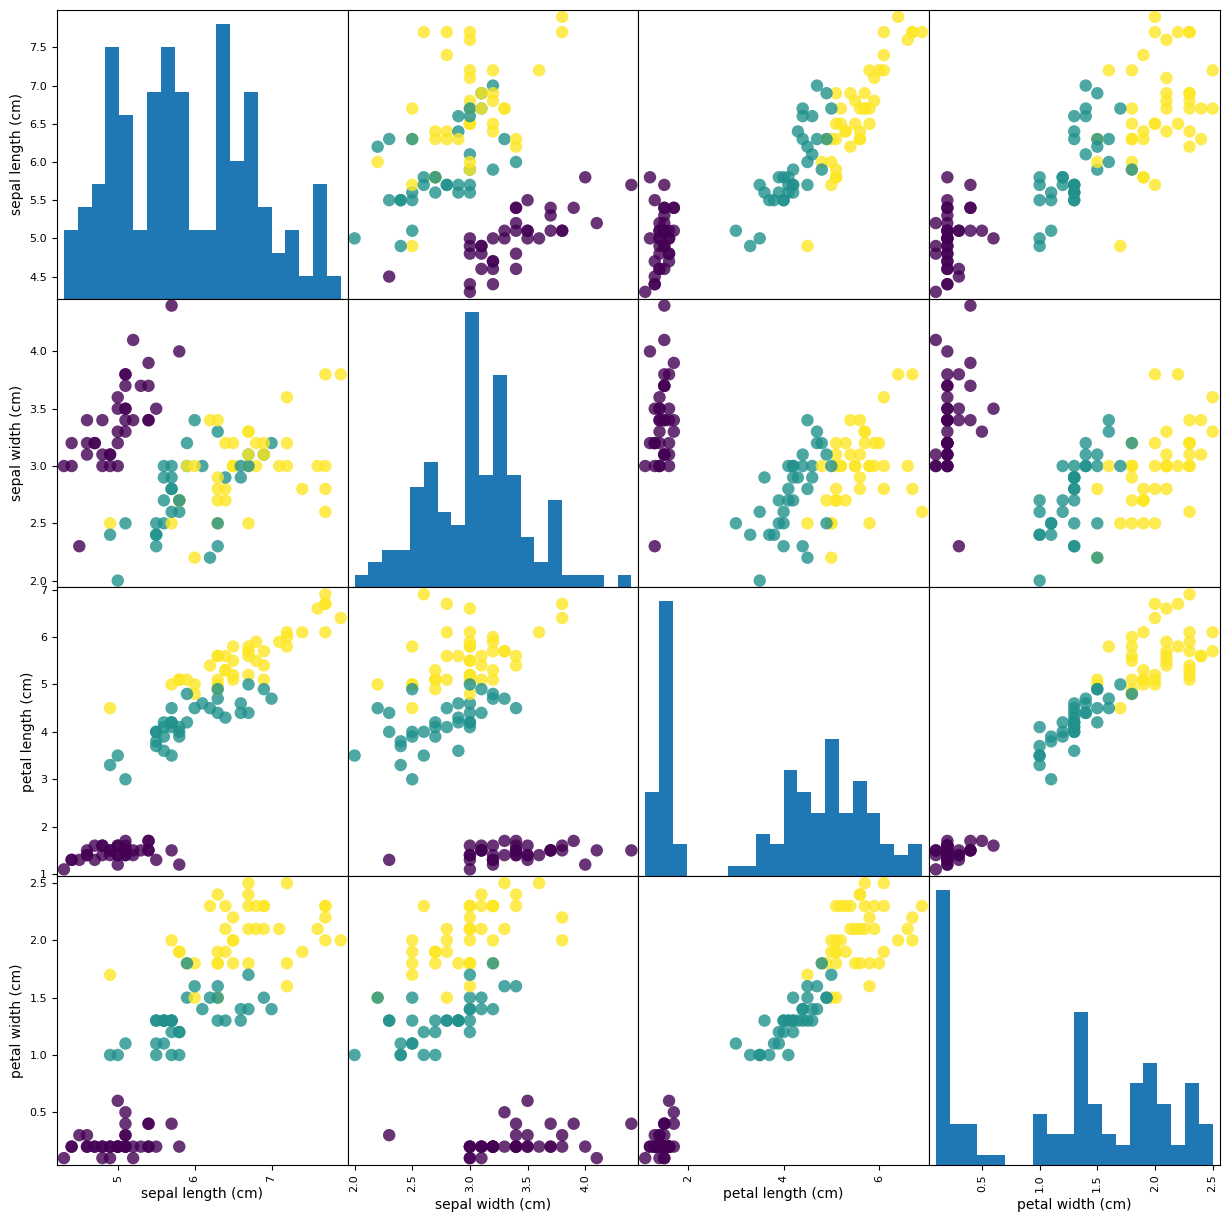

In [66]:
%matplotlib inline
scatter_matrix(iris_df, c=y_train, figsize=(15,15),marker = 'o',
               hist_kwds={'bins':20},s=80, alpha=0.8)

## MODEL DEĞERLENDİRME

1. **Değerlendirme Metrikleri**
   **Sınıflandırma Metrikleri**
    1. **Accuracy(Doğruluk)**:
       * Doğru tahminlerin toplam tahminlere oranı
       * Dengeli veri setleri için uygun

    2. **Precision(Kesinlik)**:
       * Doğru pozitif/(Doğru pozitif + Yanlış pozitif)
       * Yanlış pozitiflerin maliyeti yüksekse önemli
    3. **Recall(Duyarlılık)**:
       * Doğru pozitif/(Doğru pozitif + Yanlış negatif)
       * Yanlış negatiflerin maliyeti yüksekse önemli
    4. **F1-Score**:
       * Precision ve Recall harmonik ortalaması
       * Dengeli bir değerlendirme metriği





In [67]:
##knn oluştur
knn = KNeighborsClassifier(n_neighbors=1)

In [68]:
##modeli eğit
knn.fit(X_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [69]:
##yeni veri oluştur ve tahmin yap

X_yeni = np.array([[5,2.9,1,0.2]])
X_yeni.shape

(1, 4)

In [70]:
predict = knn.predict(X_yeni)
print('predict class',predict)
print('predict type',iris['target_names'][predict])

predict class [0]
predict type ['setosa']


In [71]:
y_predict = knn.predict(X_test)
print(y_predict)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [72]:
#test verisi üzerinde başarımı incele
print(np.mean(y_predict==y_test))

0.9736842105263158


In [73]:
print(knn.score(X_test, y_test))

0.9736842105263158
